## Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Отрисовка результата

In [3]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [4]:
DATASET_PATH_train = 'train.csv'
DATASET_PATH_test = 'test.csv'
PREPARED_DATASET_PATH = 'train_prep.csv'
EXT_PREPARED_DATASET_PATH = 'ext_train_prep.csv'
EXT_PREPARED_DATASET_PATH_test = 'ext_test_prep.csv'

In [5]:
df = pd.read_csv(DATASET_PATH_train)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [7]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [8]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


## Обработка столбца "HouseYear"
2 дома с 2020+ годом, исправил

In [9]:
df.loc[(df["HouseYear"] > 2020)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [10]:
df.loc[(df["HouseYear"] == 20052011), "HouseYear"] = 2005

In [11]:
df.loc[(df["HouseYear"] == 4968), "HouseYear"] = 2001

в первом явно ошибка, взял который ближе к среднему. Во втором взял значение года, которых 75%

## Обработка столбцов "Rooms".
Убираем квартиры без комнат. делим общую площадь на среднее по общей площади / среднее по кол-ву комнат. Корректируем когда комнат явно больше нужного

In [12]:
print(df['Square'].mean()/df['Rooms'].mean())

29.7888258121849


7 комнат соответствуют площади, остальные меняем

In [13]:
df.loc[df['Rooms'].isin([10, 19, 6]), 'Rooms'] = round(df.loc[df['Rooms'].isin([10, 19, 6]), 'Square']/29.7888258121849, 0)

In [14]:
df.loc[(df["Rooms"] == 0)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [15]:
df.loc[(df["Rooms"] == 0), "Rooms"] = round(df.loc[(df["Rooms"] == 0), "Square"] / 29.7888258121849, 0)

Посчитал среднее кол-во площади на комнату и вставил в пустые

## Обработка столбцов "Square".
смотрим выбоины

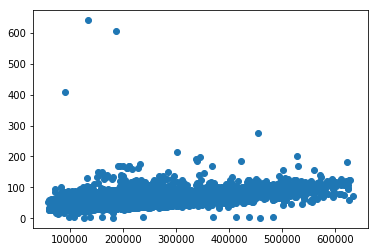

In [16]:
plt.scatter(df["Price"], df["Square"])
plt.show()

In [17]:
df.loc[(df["Square"] > 300)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


### Корректирую точки с явны перекосом в площадь/стоимость (Square > 300). Поставим значение исходя из кол-ва комнат и средней площади на комнату

In [18]:
df.loc[(df["Square"] > 300), 'Square'] = df.loc[(df["Square"] > 300), 'Rooms'] * 29.7888258121849

In [19]:
df.loc[(df["Square"] < 10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006


In [20]:
df.loc[(df["Square"] < 10), 'Square'] = df.loc[(df["Square"] < 10), 'Rooms'] * 29.7888258121849

In [21]:
df.loc[(df["Id"] == 3224), 'Rooms'] = df['Rooms'].mean()
df.loc[(df["Id"] == 3224), 'Square'] = df['Square'].mean()
df.loc[(df["Id"] == 3224), 'LifeSquare'] = df['LifeSquare'].mean()

df["Id"] == 3224 - пустая площадь, пусто кол-во комнат

## Обработка столбцов "LifeSquare".
смотрим выбоины

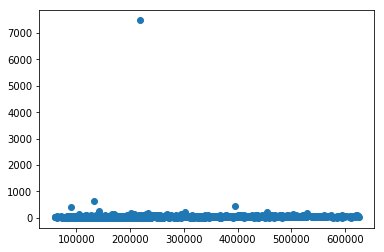

In [22]:
plt.scatter(df["Price"], df["LifeSquare"])
plt.show()

In [23]:
len(df[df["LifeSquare"].isnull()])

2113

In [24]:
print(df.loc[df["LifeSquare"].notnull(), 'Square'].mean())
print(df.loc[df["LifeSquare"].notnull(), 'LifeSquare'].mean())

55.17432544395012
37.20425069785271


средняя площадь - 56.315775, средняя жилая - 37.199645.
### Заменяем пустые в жилой
S/Sср*Sж.ср

In [25]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df.loc[df['LifeSquare'].isnull(), 'Square'] / 56.315775 * 37.199645

In [26]:
df['LifeSquare'].mean()/df['Rooms'].mean()

19.972970094478068

In [27]:
df.loc[((df["Square"] - df["LifeSquare"]))<-5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,59.577652,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
3280,10527,27,1.0,29.788826,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,211324.917957
4690,2307,102,1.0,29.788826,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,NaN,0,1,B,104891.073757
6977,11602,30,2.0,59.577652,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [28]:
print(df['Square'].mean())
print(df['LifeSquare'].mean())

56.21399183362315
37.73071590578076


In [29]:
df.loc[((df["Square"] - df["LifeSquare"]))<-5, 'LifeSquare'] = df.loc[((df["Square"] - df["LifeSquare"]))<-5, 'Square'] / 56.21399183362315 * 37.7307686496236

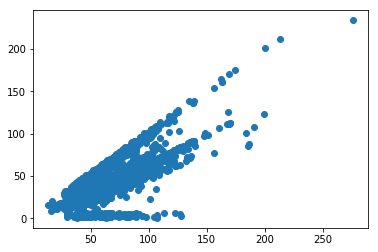

In [30]:
plt.scatter(df["Square"], df["LifeSquare"])
plt.show()

In [31]:
l=[]
for i in range(4,10):
    l.append(len(df.loc[(df["Square"] - df["LifeSquare"])>df["Square"]*i/10]))
print(l)
yl = [1,2,3,4,5,6]

[3348, 907, 280, 211, 203, 168]


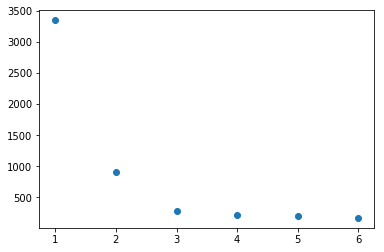

In [32]:
plt.scatter(yl, l)
plt.show()

In [33]:
len(df.loc[(df["Square"] - df["LifeSquare"])>df["Square"]*0.7])

211

убираем квартиры, в которых LifeSquare сильно меньше Square

In [34]:
df.loc[(df["Square"] - df["LifeSquare"])>df["Square"]*0.7, 'LifeSquare'] = df.loc[(df["Square"] - df["LifeSquare"])>df["Square"]*0.7, 'Square'] / 56.21399183362315 * 37.7307686496236

## Обработка столбцов "KitchenSquare"

KitchenSquare - 2014.000000  --  697 пустых.убрал выбоины 

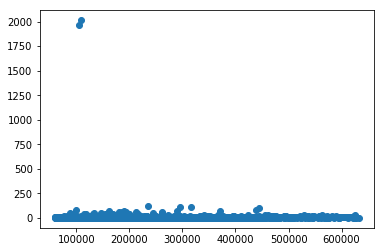

In [35]:
plt.scatter(df["Price"], df["KitchenSquare"])
plt.show()

In [36]:
print(df.loc[~df['KitchenSquare'].isin([0, 1]), 'KitchenSquare'].mean())
print(df.loc[~df['KitchenSquare'].isin([0, 1]), 'Square'].mean())

8.807978956597983
54.38436287916041


In [37]:
df.loc[df['KitchenSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [38]:
df.loc[df['KitchenSquare'] > 200, 'KitchenSquare'] = df.loc[df['KitchenSquare'] > 200, 'Square'] / 54.38436287916041 * 8.807978956597983

** заменяем кухни с площадью 0 и 1 на расчитанные

In [39]:
df.loc[df['KitchenSquare'].isin([0, 1]), 'KitchenSquare'] = df.loc[df['KitchenSquare'].isin([0, 1]), 'Square'] / 54.38436287916041 * 8.807978956597983

In [40]:
l=[]
for i in range(1,10):
    l.append(len(df.loc[df["KitchenSquare"]/df["Square"]>i/10]))
print(l)
yl = [1,2,3,4,5,6]

[9352, 1110, 74, 35, 30, 29, 29, 29, 27]


In [41]:
df.loc[(df["KitchenSquare"]/df["Square"]>4/10), 'KitchenSquare'] = df.loc[(df["KitchenSquare"]/df["Square"]>4/10), 'Square'] / 54.38436287916041 * 8.807978956597983 

исправил выбоины, где площадь кухни большая по сравнению с общей площадью

## Обработка столбцов "Floor"
в целом нормально

## Обработка столбцов "HouseFloor"
Есть 269 значений = "0". в целом нормально

In [42]:
len(df.loc[(df["HouseFloor"]) == 0])

269

## Обработка столбцов "HouseFloor"
Есть 269 значений = "0". в целом нормально

## Обработка столбцов "Ecology_1"


In [43]:
len(df.loc[(df["Ecology_1"]) == 0])

537

не понятно, что делать с пустыми

## Обработка столбцов "Ecology_2"

In [44]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [45]:
df['Ecology_2'] = (df['Ecology_2'] == "A").astype(int)
df['Ecology_2'].value_counts()

0    9903
1      97
Name: Ecology_2, dtype: int64

## Обработка столбцов "Ecology_3"

In [46]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [47]:
df['Ecology_3'] = (df['Ecology_3'] == "A").astype(int)
df['Ecology_3'].value_counts()

0    9725
1     275
Name: Ecology_3, dtype: int64

## Обработка столбцов "Social_1"

In [48]:
len(df.loc[(df["Social_1"]) == 0])

201

не понятно, что делать с пустыми

## Обработка столбцов "Social_2"

In [49]:
len(df.loc[(df["Social_2"]) == 0])

0

### Обработка столбцов "Social_3"

In [50]:
len(df.loc[(df["Social_3"]) == 0])

2997

In [51]:
df['Social_3'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,
        16,  19,  20,  23,  24,  27,  37,  39,  45,  48,  56,  59,  73,
        84,  87,  93, 141], dtype=int64)

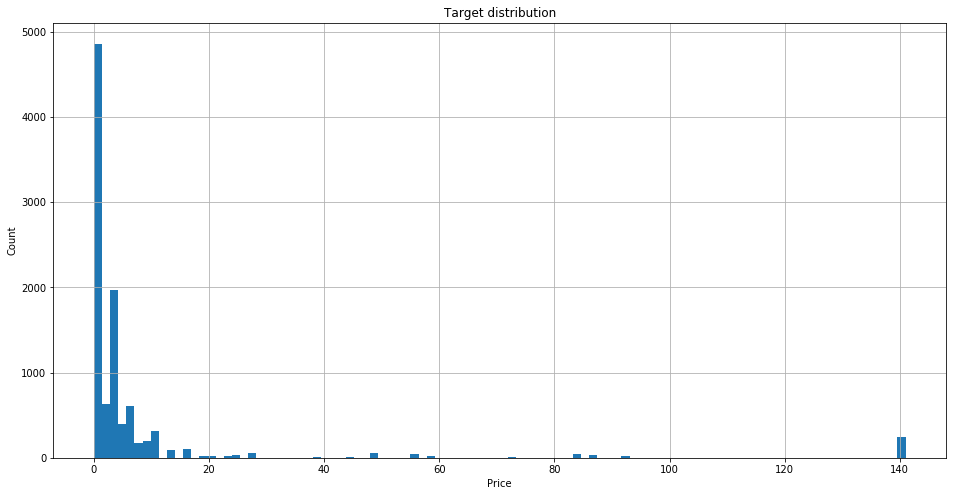

In [52]:
plt.figure(figsize = (16, 8))

df['Social_3'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

Убирать столбец? или 0 - значение?

### Обработка столбцов "Healthcare_1"

In [53]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

заменяем медианой

### Обработка столбцов "Healthcare_2"

In [54]:
len(df.loc[(df["Helthcare_2"]) == 0])

4214

In [55]:
df['Helthcare_2'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

разбиваем на dummies

In [56]:
Helthcare_2_dummies = pd.get_dummies(df["Helthcare_2"], prefix="Helthcare_2", dummy_na=False)
df = pd.concat([df, Helthcare_2_dummies], axis=1)

### Обработка столбцов "Shops_1"

In [57]:
len(df.loc[(df["Shops_1"]) == 0])

2316

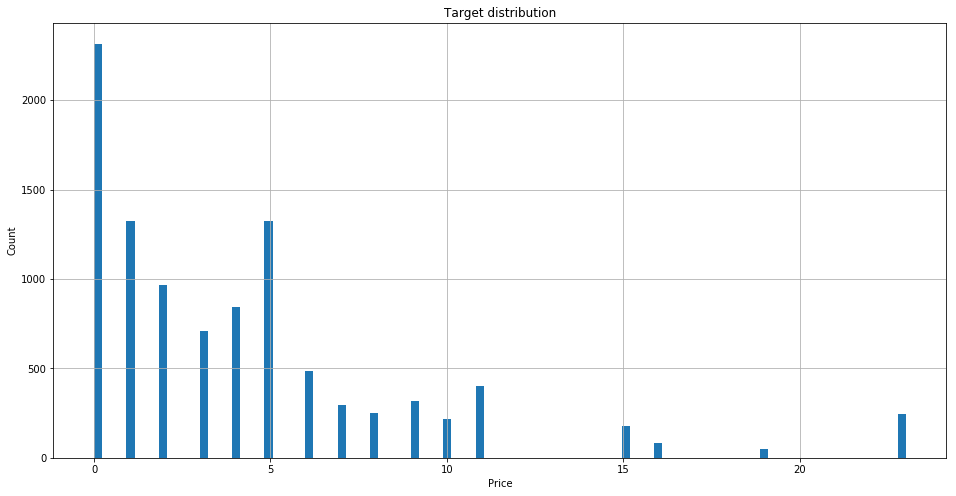

In [58]:
plt.figure(figsize = (16, 8))

df['Shops_1'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

разбиваем на 4 категории. 0, от 1 до 5, 6-10, 11+

In [59]:
df['Shops_1_cat'] = 1
df.loc[df["Shops_1"] == 0, "Shops_1_cat"] = "A"
df.loc[(df["Shops_1"] >0) & (df["Shops_1"] < 6), "Shops_1_cat"] = "B"
df.loc[(df["Shops_1"] >5) & (df["Shops_1"] < 11), "Shops_1_cat"] = "C"
df.loc[df["Shops_1"] >10, "Shops_1_cat"] = "D"
df['Shops_1_cat'].value_counts()

B    5165
A    2316
C    1565
D     954
Name: Shops_1_cat, dtype: int64

In [60]:
Shops_1_cat_dummies = pd.get_dummies(df["Shops_1_cat"], prefix="Shops_1_cat", dummy_na=False)
df = pd.concat([df, Shops_1_cat_dummies], axis=1)

## Обработка столбцов "Shops_2"

In [61]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [62]:
df['Shops_2'] = (df['Shops_2'] == "A").astype(int)
df['Shops_2'].value_counts()

0    9175
1     825
Name: Shops_2, dtype: int64

## добавление нового признака (DistrictId и Square и Price)

In [63]:
for i in range (10, 280, 10):
    df.loc[(df['Square'] > i) & (df['Square'] < i + 10), 'Squaremed'] = i + 5
df['Squaremed'].value_counts()

45.0     2824
35.0     1732
55.0     1697
65.0     1625
75.0      914
85.0      680
95.0      167
105.0     124
25.0       93
115.0      46
125.0      40
135.0      22
15.0        9
165.0       9
145.0       4
155.0       3
175.0       3
185.0       3
195.0       2
205.0       1
215.0       1
275.0       1
Name: Squaremed, dtype: int64

In [64]:
med_price_by_district = df.groupby(['DistrictId', 'Squaremed'], as_index=False).agg({'Price':'mean'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Squaremed,MedPriceByDistrict
0,0,15.0,95633.769543
1,0,35.0,148291.998257
2,0,45.0,144464.105362
3,0,55.0,206032.787861
4,0,65.0,226273.535612


In [65]:
df = df.merge(med_price_by_district, on=['DistrictId', 'Squaremed'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Shops_1_cat,Shops_1_cat_A,Shops_1_cat_B,Shops_1_cat_C,Shops_1_cat_D,Squaremed,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.000000,7,9.0,1969,0.089040,...,0,0,0,D,0,0,0,1,45.0,202409.196840
1,15053,41,3.0,65.683640,40.049543,8.000000,7,9.0,1978,0.000070,...,0,0,0,D,0,0,0,1,65.0,252584.489546
2,4765,53,2.0,44.947953,29.197612,7.279677,8,12.0,1968,0.049637,...,0,0,0,B,0,1,0,0,45.0,211130.173521
3,5809,58,2.0,53.352981,52.731512,9.000000,8,17.0,1977,0.437885,...,0,0,0,B,0,1,0,0,55.0,144416.527694
4,10783,99,1.0,39.649192,23.776169,7.000000,11,12.0,1976,0.012339,...,0,0,0,B,0,1,0,0,35.0,152680.191019


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 34 columns):
Id                    10000 non-null int64
DistrictId            10000 non-null int64
Rooms                 10000 non-null float64
Square                10000 non-null float64
LifeSquare            10000 non-null float64
KitchenSquare         10000 non-null float64
Floor                 10000 non-null int64
HouseFloor            10000 non-null float64
HouseYear             10000 non-null int64
Ecology_1             10000 non-null float64
Ecology_2             10000 non-null int32
Ecology_3             10000 non-null int32
Social_1              10000 non-null int64
Social_2              10000 non-null int64
Social_3              10000 non-null int64
Healthcare_1          10000 non-null float64
Helthcare_2           10000 non-null int64
Shops_1               10000 non-null int64
Shops_2               10000 non-null int32
Price                 10000 non-null float64
Helthcare_2_0   

In [67]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

# Модель

### отбор признаков

In [68]:
dfmod = pd.read_csv(PREPARED_DATASET_PATH)
dfmod.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Shops_1_cat,Shops_1_cat_A,Shops_1_cat_B,Shops_1_cat_C,Shops_1_cat_D,Squaremed,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.000000,7,9.0,1969,0.089040,...,0,0,0,D,0,0,0,1,45.0,202409.196840
1,15053,41,3.0,65.683640,40.049543,8.000000,7,9.0,1978,0.000070,...,0,0,0,D,0,0,0,1,65.0,252584.489546
2,4765,53,2.0,44.947953,29.197612,7.279677,8,12.0,1968,0.049637,...,0,0,0,B,0,1,0,0,45.0,211130.173521
3,5809,58,2.0,53.352981,52.731512,9.000000,8,17.0,1977,0.437885,...,0,0,0,B,0,1,0,0,55.0,144416.527694
4,10783,99,1.0,39.649192,23.776169,7.000000,11,12.0,1976,0.012339,...,0,0,0,B,0,1,0,0,35.0,152680.191019


In [69]:
dfmod.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Helthcare_2_0',
 'Helthcare_2_1',
 'Helthcare_2_2',
 'Helthcare_2_3',
 'Helthcare_2_4',
 'Helthcare_2_5',
 'Helthcare_2_6',
 'Shops_1_cat',
 'Shops_1_cat_A',
 'Shops_1_cat_B',
 'Shops_1_cat_C',
 'Shops_1_cat_D',
 'Squaremed',
 'MedPriceByDistrict']

In [70]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2',  'Helthcare_2_0', 'Helthcare_2_1',
                 'Helthcare_2_2', 'Helthcare_2_3', 'Helthcare_2_4', 'Helthcare_2_5', 'Helthcare_2_6',
                 'Shops_1_cat_B', 'Shops_1_cat_C', 'Shops_1_cat_D', 'MedPriceByDistrict']

target_name = 'Price'

In [71]:
X = dfmod[feature_names]
y = dfmod[target_name]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [73]:
rf_model = RandomForestRegressor(n_estimators=40, max_depth=20, random_state=21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=21, verbose=0, warm_start=False)

Train R2:	0.97
Test R2:	0.794


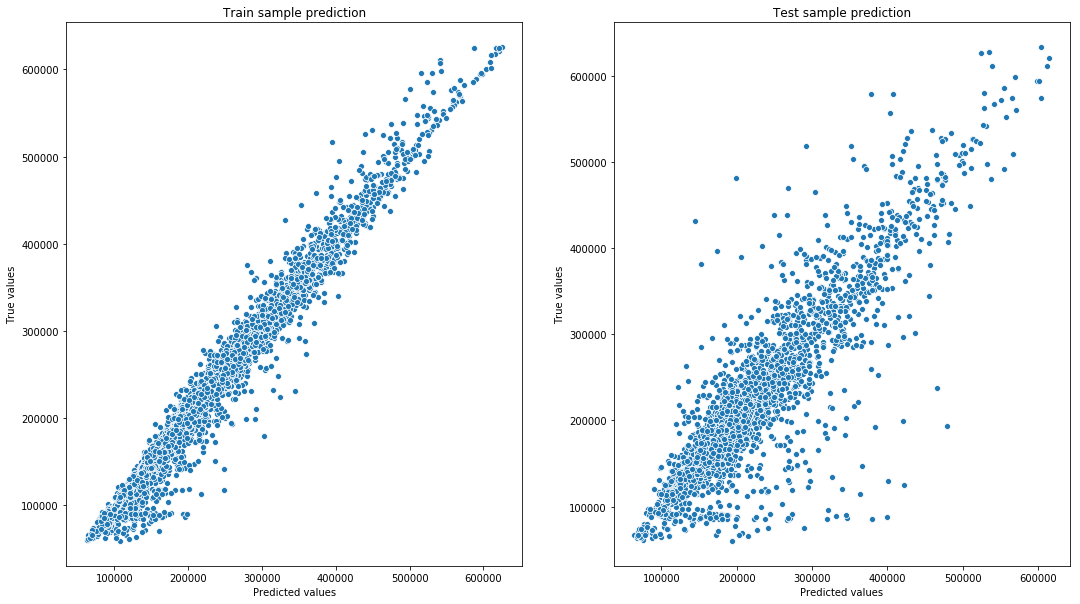

In [74]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Перекрёстная проверка**

In [75]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.79517724, 0.79293819, 0.81676886])

In [76]:
cv_score.mean()

0.8016280976245911

In [77]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
27,MedPriceByDistrict,0.826572
1,Square,0.023392
6,HouseYear,0.021022
2,LifeSquare,0.019948
4,Floor,0.017815
5,HouseFloor,0.014167
3,KitchenSquare,0.014070
7,Ecology_1,0.010216
11,Social_2,0.009123
13,Healthcare_1,0.008561


# Обработка данных тест

In [78]:
dftest = pd.read_csv(DATASET_PATH_test)
dftest.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [79]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Shops_1_cat_A,Shops_1_cat_B,Shops_1_cat_C,Shops_1_cat_D,Squaremed,MedPriceByDistrict
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.889089,56.213992,37.559156,8.550884,8.526700,12.609400,1984.869000,0.118858,...,0.167000,0.028800,0.038800,0.00990,0.231600,0.516500,0.156500,0.095400,56.231000,214138.857399
std,4859.01902,43.587592,0.813552,19.085274,16.315974,2.937854,5.241148,6.775974,18.411451,0.119025,...,0.372995,0.167252,0.193128,0.09901,0.421876,0.499753,0.363347,0.293781,19.181017,83475.375121
min,0.00000,0.000000,1.000000,13.784865,8.822988,2.000000,1.000000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,15.000000,68117.542443
25%,4169.50000,20.000000,1.000000,41.782323,25.864020,6.243324,4.000000,9.000000,1974.000000,0.017647,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,45.000000,160299.673960
50%,8394.50000,36.000000,2.000000,52.535436,33.953549,8.000000,7.000000,13.000000,1977.000000,0.075424,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,55.000000,191728.168554
75%,12592.50000,75.000000,2.000000,65.894295,45.381406,10.000000,12.000000,17.000000,2001.000000,0.195781,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,65.000000,249165.087310
max,16798.00000,209.000000,7.000000,275.645284,233.949309,43.000000,42.000000,117.000000,2020.000000,0.521867,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,275.000000,624549.354546


In [80]:
len(dftest) - dftest.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

## Обработка столбца "HouseYear"
все нормально

## Обработка столбцов "Rooms".

In [81]:
dftest.loc[dftest['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [82]:
dftest.loc[dftest['Rooms'].isin([17, 6]), 'Rooms'] = round(dftest.loc[dftest['Rooms'].isin([17, 6]), 'Square']/29.7888258121849, 0)

In [83]:
dftest.loc[(dftest["Rooms"] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [84]:
dftest.loc[(dftest["Rooms"] == 0), "Rooms"] = round(dftest.loc[(df["Rooms"] == 0), "Square"] / 29.7888258121849, 0)

In [85]:
dftest.loc[dftest["Rooms"].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,NaN,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,NaN,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [86]:
dftest.loc[dftest["Rooms"].isnull(), "Rooms"] = round(dftest.loc[dftest["Rooms"].isnull(), "Square"] / 29.7888258121849, 0)

## Обработка столбцов "Square".

In [87]:
dftest.loc[(dftest["Square"] > 300)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [88]:
dftest.loc[(dftest["Square"] < 10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [89]:
dftest.loc[(dftest["Square"] < 10), 'Square'] = dftest.loc[(dftest["Square"] < 10), 'Rooms'] * 29.7888258121849

## Обработка столбцов "LifeSquare"

In [90]:
len(dftest[dftest["LifeSquare"].isnull()])

1041

In [91]:
dftest.loc[dftest['LifeSquare'].isnull(), 'LifeSquare'] = dftest.loc[dftest['LifeSquare'].isnull(), 'Square'] / 56.315775 * 37.199645

In [92]:
dftest.loc[((dftest["Square"] - dftest["LifeSquare"]))<-5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,NaN,0,0,B


In [93]:
dftest.loc[((dftest["Square"] - dftest["LifeSquare"]))<-5, 'LifeSquare'] = dftest.loc[((dftest["Square"] - dftest["LifeSquare"]))<-5, 'Square'] / 56.21399183362315 * 37.7307686496236

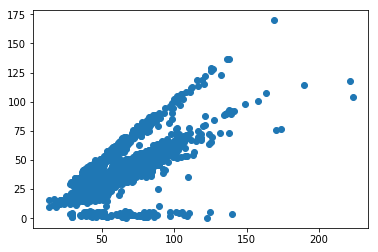

In [94]:
plt.scatter(dftest["Square"], dftest["LifeSquare"])
plt.show()

In [95]:
len(dftest.loc[(dftest["Square"] - dftest["LifeSquare"])>dftest["Square"]*0.7])

112

In [96]:
dftest.loc[(dftest["Square"] - dftest["LifeSquare"])>dftest["Square"]*0.7, 'LifeSquare'] = dftest.loc[(dftest["Square"] - dftest["LifeSquare"])>dftest["Square"]*0.7, 'Square'] / 56.21399183362315 * 37.7307686496236

## Обработка столбцов "KitchenSquare"

In [97]:
dftest.loc[dftest['KitchenSquare'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.22377,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B


In [98]:
dftest.loc[dftest['KitchenSquare'] > 200, 'KitchenSquare'] = dftest.loc[dftest['KitchenSquare'] > 200, 'Square'] / 54.38436287916041 * 8.807978956597983

In [99]:
dftest.loc[dftest['KitchenSquare'].isin([0, 1]), 'KitchenSquare'] = dftest.loc[dftest['KitchenSquare'].isin([0, 1]), 'Square'] / 54.38436287916041 * 8.807978956597983

In [100]:
dftest.loc[(dftest["KitchenSquare"]/dftest["Square"]>4/10), 'KitchenSquare'] = dftest.loc[(dftest["KitchenSquare"]/dftest["Square"]>4/10), 'Square'] / 54.38436287916041 * 8.807978956597983 

## Обработка столбцов "Ecology_2"

In [101]:
dftest['Ecology_2'] = (dftest['Ecology_2'] == "A").astype(int)
dftest['Ecology_2'].value_counts()

0    4952
1      48
Name: Ecology_2, dtype: int64

### Обработка столбцов "Ecology_3"

In [102]:
dftest['Ecology_3'] = (dftest['Ecology_3'] == "A").astype(int)
dftest['Ecology_3'].value_counts()

0    4851
1     149
Name: Ecology_3, dtype: int64

## Обработка столбцов "Healthcare_1"

In [103]:
dftest.loc[dftest['Healthcare_1'].isnull(), 'Healthcare_1'] = dftest['Healthcare_1'].median()

## Обработка столбцов "Healthcare_2"

In [104]:
Helthcare_2_dummies = pd.get_dummies(dftest["Helthcare_2"], prefix="Helthcare_2", dummy_na=False)
dftest = pd.concat([dftest, Helthcare_2_dummies], axis=1)

## Обработка столбцов "Shops_1"

In [105]:
dftest['Shops_1_cat'] = 1
dftest.loc[dftest["Shops_1"] == 0, "Shops_1_cat"] = "A"
dftest.loc[(dftest["Shops_1"] >0) & (dftest["Shops_1"] < 6), "Shops_1_cat"] = "B"
dftest.loc[(dftest["Shops_1"] >5) & (dftest["Shops_1"] < 11), "Shops_1_cat"] = "C"
dftest.loc[dftest["Shops_1"] >10, "Shops_1_cat"] = "D"
dftest['Shops_1_cat'].value_counts()

B    2585
A    1150
C     774
D     491
Name: Shops_1_cat, dtype: int64

In [106]:
Shops_1_cat_dummies = pd.get_dummies(dftest["Shops_1_cat"], prefix="Shops_1_cat", dummy_na=False)
dftest = pd.concat([dftest, Shops_1_cat_dummies], axis=1)

## Обработка столбцов "Shops_2"

In [107]:
dftest['Shops_2'] = (dftest['Shops_2'] == "A").astype(int)
dftest['Shops_2'].value_counts()

0    4588
1     412
Name: Shops_2, dtype: int64

## добавление нового признака (DistrictId и Square и Price)

In [108]:
for i in range (10, 280, 10):
    dftest.loc[(dftest['Square'] > i) & (dftest['Square'] < i + 10), 'Squaremed'] = i + 5
dftest['Squaremed'].value_counts()

45.0     1389
35.0      870
65.0      846
55.0      812
75.0      447
85.0      380
95.0       76
105.0      70
25.0       42
115.0      20
135.0      17
125.0      14
15.0        7
145.0       2
165.0       2
175.0       2
225.0       2
155.0       1
185.0       1
Name: Squaremed, dtype: int64

In [119]:
dftest_tt = dftest.merge(med_price_by_district, on=['DistrictId', 'Squaremed'], how='left')

In [120]:
len(dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull()])

202

In [121]:
x = dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull(), 'Squaremed'].unique()
x

array([ 15.,  35.,  75.,  85.,  25.,  95.,  65., 125.,  45.,  55., 105.,
       115., 175., 185., 135., 145., 165., 225.])

пробегаемся по всем уникальным средним площадям и заменяем пустые на средние по не пустым.

In [122]:
for i in x:
    dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull() & (dftest_tt['Squaremed'] == i), 'MedPriceByDistrict'] = dftest_tt.loc[dftest_tt['MedPriceByDistrict'].notnull() & (dftest_tt['Squaremed'] == i), 'MedPriceByDistrict'].mean()

In [123]:
dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Shops_1_cat,Shops_1_cat_A,Shops_1_cat_B,Shops_1_cat_C,Shops_1_cat_D,Squaremed,MedPriceByDistrict
1264,13589,27,3.0,173.974480,76.289475,9.0,3,3.0,2017,0.041116,...,0,0,0,B,0,1,0,0,175.0,NaN
1499,7769,124,4.0,189.679576,114.708673,4.0,19,40.0,2013,0.174739,...,0,0,0,B,0,1,0,0,185.0,NaN
2039,3357,27,3.0,170.476326,75.973612,8.0,2,2.0,2017,0.041116,...,0,0,0,B,0,1,0,0,175.0,NaN
3217,4058,27,8.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,...,0,0,0,B,0,1,0,0,225.0,NaN
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,...,0,0,0,B,0,1,0,0,225.0,NaN


In [124]:
print(df.loc[df['Squaremed'] == 175, 'MedPriceByDistrict'].mean())
print(df.loc[df['Squaremed'] == 185, 'MedPriceByDistrict'].mean())
print(df.loc[df['Squaremed'] > 200, 'MedPriceByDistrict'].mean())

319466.2741400798
462201.84264934045
428678.8831897408


In [127]:
dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull() & (dftest_tt['Squaremed'] == 175), 'MedPriceByDistrict'] = df.loc[df['Squaremed'] == 175, 'MedPriceByDistrict'].mean()
dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull() & (dftest_tt['Squaremed'] == 185), 'MedPriceByDistrict'] = df.loc[df['Squaremed'] == 185, 'MedPriceByDistrict'].mean()
dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull() & (dftest_tt['Squaremed'] == 225), 'MedPriceByDistrict'] = df.loc[df['Squaremed'] > 200, 'MedPriceByDistrict'].mean()

In [128]:
dftest_tt.loc[dftest_tt['Squaremed'] == 225]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Shops_1_cat,Shops_1_cat_A,Shops_1_cat_B,Shops_1_cat_C,Shops_1_cat_D,Squaremed,MedPriceByDistrict
3217,4058,27,8.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,...,0,0,0,B,0,1,0,0,225.0,428678.88319
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,...,0,0,0,B,0,1,0,0,225.0,428678.88319


In [130]:
len(dftest_tt.loc[dftest_tt['MedPriceByDistrict'].isnull()])

0

### обработали все несмердженные

In [131]:
dftest_tt.to_csv(EXT_PREPARED_DATASET_PATH_test, index=False, encoding='utf-8')

## Предсказание по модели

In [132]:
dftest_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 33 columns):
Id                    5000 non-null int64
DistrictId            5000 non-null int64
Rooms                 5000 non-null float64
Square                5000 non-null float64
LifeSquare            5000 non-null float64
KitchenSquare         5000 non-null float64
Floor                 5000 non-null int64
HouseFloor            5000 non-null float64
HouseYear             5000 non-null int64
Ecology_1             5000 non-null float64
Ecology_2             5000 non-null int32
Ecology_3             5000 non-null int32
Social_1              5000 non-null int64
Social_2              5000 non-null int64
Social_3              5000 non-null int64
Healthcare_1          5000 non-null float64
Helthcare_2           5000 non-null int64
Shops_1               5000 non-null int64
Shops_2               5000 non-null int32
Helthcare_2_0         5000 non-null uint8
Helthcare_2_1         5000 non-null uin

In [133]:
X_test = dftest_tt[feature_names]

In [134]:
y_test_preds = rf_model.predict(X_test)

In [135]:
y_test_preds_pd = pd.DataFrame({'Price':y_test_preds})

In [136]:
y_test_preds_pd = pd.concat([dftest, y_test_preds_pd], axis=1)

y_test_preds_pd = y_test_preds_pd[['Id', 'Price']]
y_test_preds_pd.head()

,Id,Price
0,725,143242.299152
1,15856,212304.311411
2,5480,107762.431026
3,15664,344930.881617
4,14275,139015.570277


In [137]:
len(y_test_preds_pd)

5000

In [138]:
y_test_preds_pd.to_csv('SIvanov_predictions.csv', index=False, encoding='utf-8')